# Liquid/Vapor Equilibrium : dew and boiling curve

The vapor pressure of benzene and toluene are given by the following equation
$$log_{lO} P_A^0 (Pa)=\frac{- 0,05223 A}{T} + B$$
Where T is the temperature in Kelvin and A et B are constant given below.
  
			    A (K)            B
	Benzene		32295		9,7795
	Toluene		39198		10,45449
 
By considering that the mixture benzene-toluene is ideal, calculate the molar fraction of benzene in :

a) the mixture boiling at 97°C under the normal pressure (101300 Pa)

b) the first drop of distillate

c) Plot the boiling and the dew point curves. 

d) Plot the square diagram.

e) Determine the boiling temperature of a mixture having a molar fraction of 0.3

At a pressure of 101300 Pa the boiling temperature of Benzene is 353.33 K and of toluene is 375.73 K
At a temperature of 370.15 T the vapor pressure of Benzene is 166923 Pa and of toluene is 83841 Pa

The molar fraction in Benzene of a mixture boiling at 370.15 K is 0.21
The first condensate obtained at  370.15 is 0.346 in Benzene


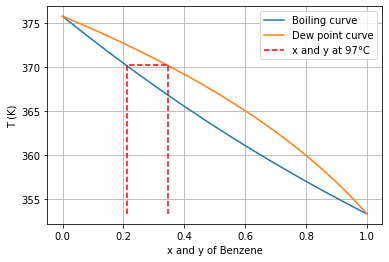

In [66]:
import numpy as np
import matplotlib.pyplot as plt
#Data for Antoine Laws
K=0.05223
A_BZ=32295
B_BZ=9.7795
A_TL=39198
B_TL=10.45449
P=101300 #Pa
#calculation of the boiling temperature of pure A and B at atm pressure
T_BZ=(-K*A_BZ)/(np.log10(P)-B_BZ)
T_TL=(-K*A_TL)/(np.log10(P)-B_TL)
print ('At a pressure of {} Pa the boiling temperature of Benzene is {:.2f} K and of toluene is {:.2f} K'.format(P,T_BZ,T_TL))

def P0_BZ(T):
    return 10**(B_BZ-K*A_BZ/T)
def P0_TL(T):
    return 10**(B_TL-K*A_TL/T)
def x_BZ(T):
    return (P-P0_TL(T))/(P0_BZ(T)-P0_TL(T))
def y_BZ(T):
    return x_BZ(T)*P0_BZ(T)/P

T97=97+273.15
print ('At a temperature of {} T the vapor pressure of Benzene is {:.0f} Pa and of toluene is {:.0f} Pa'.format(T97,P0_BZ(T97),P0_TL(T97)))
print ('')
print ('The molar fraction in Benzene of a mixture boiling at', T97, 'K is',round(x_BZ(T97),3))
print ('The first condensate obtained at ', T97, 'is',round(y_BZ(T97),3), 'in Benzene')
T=np.linspace(T_BZ,T_TL,100)
plt.plot(x_BZ(T),T,label='Boiling curve')
plt.plot(y_BZ(T),T,label='Dew point curve')
plt.plot([x_BZ(T97),x_BZ(T97),y_BZ(T97),y_BZ(T97)],[T_BZ,T97,T97,T_BZ], 'r--',label='x and y at 97°C')
plt.legend(loc='best')
plt.xlabel('x and y of Benzene')
plt.ylabel('T (K)')
plt.grid()
plt.show()




In [67]:
import numpy as np
import matplotlib.pyplot as plt
alpha1=P0_BZ((T_BZ+T_TL)/2)/P0_TL((T_BZ+T_TL)/2)
print ('The mean relative volatility is', round(alpha1,3))
print ('determined at the mean temperature of the boiling temperature of benzene and toluene')

The mean relative volatility is 2.061
determined at the mean temperature of the boiling temperature of benzene and toluene


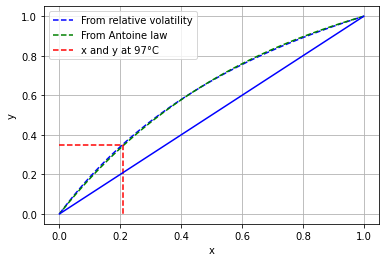

In [68]:
#plot of square diagram y=f(x)
x=np.linspace(0,1,100)
y=alpha1*x/(1+(alpha1-1)*x)
yb=x
plt.plot(x,y, 'b--', label='From relative volatility')
plt.plot(x_BZ(T),y_BZ(T), 'g--', label='From Antoine law')
plt.plot([0,x_BZ(T97),x_BZ(T97)],[y_BZ(T97),y_BZ(T97),0], 'r--',label='x and y at 97°C')
plt.plot(x,yb,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Un mélange de composition 0.3 en Benzène a une température d ébulition 367.91 K


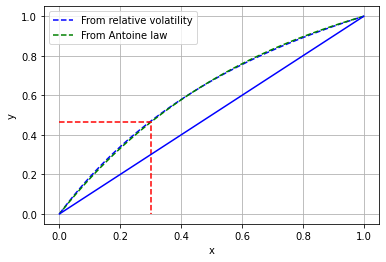

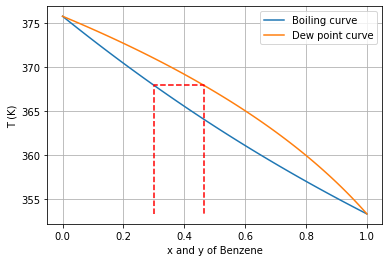

In [69]:
from scipy.optimize import fsolve

x_BZX=0.3 #Fraction molaire en benzene dont on recherche la temperature d'ebulition 
#Fonction dont il faut trouver la racine pour trouver la temperature d'ebulition d'un mélange à x_BZX
def xeb(T):
    return x_BZ(T)-x_BZX
#Résolution 
Teb = fsolve(xeb, x0=T_BZ)[0]
print('Un mélange de composition',x_BZX, 'en Benzène a une température d ébulition', round(Teb,2), 'K')

plt.plot(x,y, 'b--', label='From relative volatility')
plt.plot(x_BZ(T),y_BZ(T), 'g--', label='From Antoine law')
plt.plot([0,x_BZ(Teb),x_BZ(Teb)],[y_BZ(Teb),y_BZ(Teb),0], 'r--')
plt.plot(x,yb,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

plt.plot(x_BZ(T),T,label='Boiling curve')
plt.plot(y_BZ(T),T,label='Dew point curve')
plt.plot([x_BZ(Teb),x_BZ(Teb),y_BZ(Teb),y_BZ(Teb)],[T_BZ,Teb,Teb,T_BZ], 'r--')
plt.legend(loc='best')
plt.xlabel('x and y of Benzene')
plt.ylabel('T (K)')
plt.grid()
plt.show()